## Project Objective

The objective of this project is to predict the air quality level based on air pollution sensor data and meteorological variables.  

The air quality levels were categorized into discrete classes to transform the problem into a classification task. This allows easier interpretation of pollution conditions and supports decision-making related to environmental monitoring.


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("C:/Users/ABL/Documents/Codes/AQI/AirQuality.csv", sep=";")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [2]:
# Innformation about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [3]:
# Drop unnecessary colomns 
df.drop(["Unnamed: 15", "Unnamed: 16"], axis=1, inplace=True)

In [4]:
# checking for duplicates 
df.duplicated().sum()

np.int64(113)

In [5]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [6]:
# Missing values 
df.isnull().sum()

Date             1
Time             1
CO(GT)           1
PT08.S1(CO)      1
NMHC(GT)         1
C6H6(GT)         1
PT08.S2(NMHC)    1
NOx(GT)          1
PT08.S3(NOx)     1
NO2(GT)          1
PT08.S4(NO2)     1
PT08.S5(O3)      1
T                1
RH               1
AH               1
dtype: int64

In [7]:
# list only the object columns we want to fix
cols_to_fix = ["CO(GT)", "C6H6(GT)", "T", "RH", "AH"]

# replace commas with dots only in these columns
for col in cols_to_fix:
    df[col] = df[col].str.replace(',', '.', regex=False)

In [8]:
# Convert numeric columns to float
cols_to_convert = ["CO(GT)", "C6H6(GT)", "T", "RH", "AH"]
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # format is DD/MM/YYYY

In [10]:
# Extract Day, Month, Year
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [11]:
df['Day'] = df['Day'].fillna(df['Day'].median())
df['Month'] = df['Month'].fillna(df['Month'].median())
df['Year'] = df['Year'].fillna(df['Year'].median())

In [12]:
df['Day'] = df['Day'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [13]:
df.drop(columns=["Date"], inplace=True)

In [14]:
# Fill missing Time values with a default time
df['Time'] = df['Time'].fillna('00.00.00')

# Extract hour as int
df['Time'] = df['Time'].str.split('.').str[0].astype(int)

In [15]:
df.dtypes

Time               int64
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Day                int64
Month              int64
Year               int64
dtype: object

In [16]:
# Select only float columns
float_cols = df.select_dtypes(include="float64").columns
# Replace -200 with NaN ONLY in float columns
df[float_cols] = df[float_cols].replace(-200, np.nan)

In [17]:
df.isnull().sum()

Time                0
CO(GT)           1684
PT08.S1(CO)       367
NMHC(GT)         8444
C6H6(GT)          367
PT08.S2(NMHC)     367
NOx(GT)          1640
PT08.S3(NOx)      367
NO2(GT)          1643
PT08.S4(NO2)      367
PT08.S5(O3)       367
T                 367
RH                367
AH                367
Day                 0
Month               0
Year                0
dtype: int64

In [34]:
import pandas as pd
from ydata_profiling import ProfileReport

# Load your dataset
df = pd.read_csv("air_quality_cleaned.csv")

# Generate profile report
profile = ProfileReport(df, title="Air Quality Dataset Profiling", explorative=True)

# Display in notebook
profile.to_widgets()  # interactive widgets in notebook
# OR display as HTML
profile.to_notebook_iframe()
# Save as HTML file
# profile.to_file("Air_Quality_Profile.html")

AttributeError: module 'numba' has no attribute 'extending'

In [18]:
# Fill NaN with median
df[float_cols] = df[float_cols].fillna(df[float_cols].median())

In [19]:
df.isnull().sum()

Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Day              0
Month            0
Year             0
dtype: int64

In [20]:
# Create the target column (Air Quality Level)
def air_quality_level(co):
    if co <= 2:
        return "Low"
    elif co <= 5:
        return "Medium"
    else:
        return "High"

df["Air_Quality_Level"] = df["CO(GT)"].apply(air_quality_level)


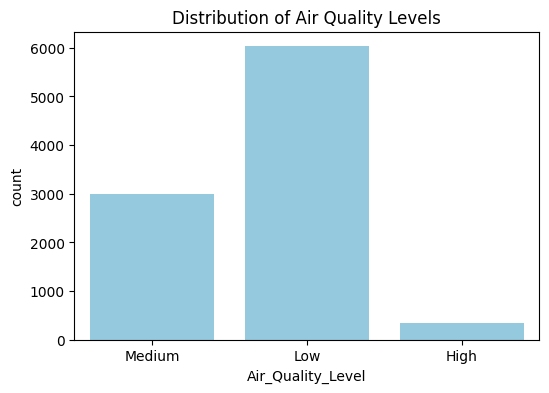

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
# Count of air quality levels
plt.figure(figsize=(6,4))
sns.countplot(x="Air_Quality_Level", data=df, color="skyblue")
plt.title("Distribution of Air Quality Levels")
plt.show()

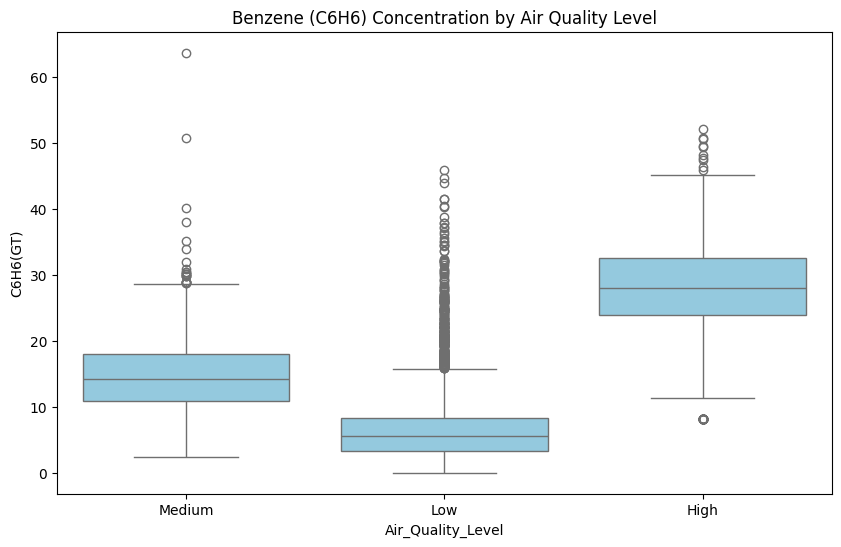

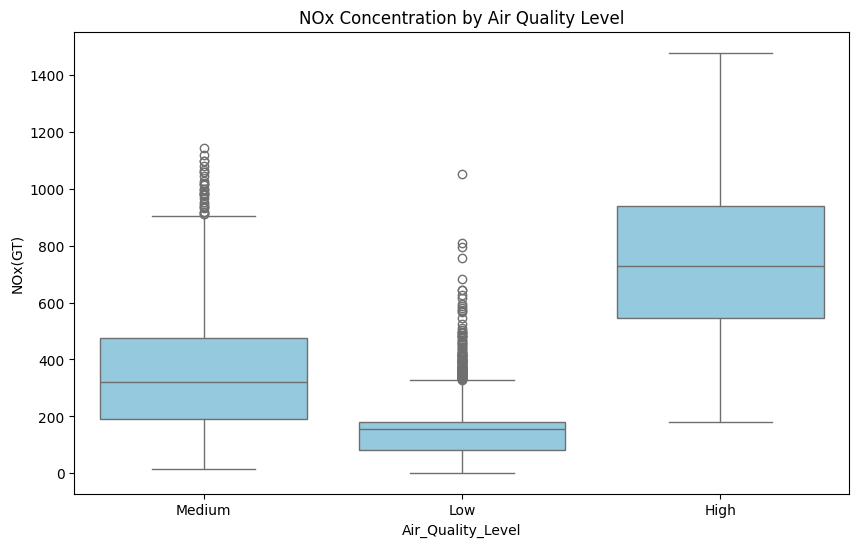

In [30]:
# Boxplot of key pollutants by Air Quality Level
plt.figure(figsize=(10,6))
sns.boxplot(x="Air_Quality_Level", y="C6H6(GT)", data=df, color="skyblue")
plt.title("Benzene (C6H6) Concentration by Air Quality Level")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x="Air_Quality_Level", y="NOx(GT)", data=df, color="skyblue")
plt.title("NOx Concentration by Air Quality Level")
plt.show()

In [ ]:
df.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Day,Month,Year,Air_Quality_Level
0,18,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,10,3,2004,Medium
1,19,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,10,3,2004,Low
2,20,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,10,3,2004,Medium
3,21,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,10,3,2004,Medium
4,22,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,10,3,2004,Low


In [ ]:
# Select features
# CO(GT) is NOT included in X
features = [
    "PT08.S1(CO)",
    "C6H6(GT)",
    "PT08.S2(NMHC)",
    "NOx(GT)",
    "PT08.S3(NOx)",
    "NO2(GT)",
    "PT08.S4(NO2)",
    "PT08.S5(O3)",
    "T",
    "RH",
    "AH"
]

X = df[features]
y = df["Air_Quality_Level"]


In [ ]:
# Encode target labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [ ]:
# Standardize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the model (Random Forest)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

model.fit(X_train_scaled, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9225427350427351

Classification Report:

              precision    recall  f1-score   support

        High       0.79      0.65      0.71        69
         Low       0.95      0.96      0.95      1206
      Medium       0.88      0.88      0.88       597

    accuracy                           0.92      1872
   macro avg       0.87      0.83      0.85      1872
weighted avg       0.92      0.92      0.92      1872


Confusion Matrix:

[[  45    0   24]
 [   1 1156   49]
 [  11   60  526]]


In [ ]:
import joblib

# Save model and scaler
joblib.dump(model, "rf_air_quality_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le, "label_encoder.pkl") # Make sure you saved it after training

['label_encoder.pkl']